In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Data=pd.read_csv('Marketing.csv')
Data.dropna(subset=['Income'],inplace=True)
Data.isna().sum()

Unnamed: 0             0
Age                    0
Education              0
Status                 0
Income                 0
Kid                    0
Teen                   0
Duration               0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [58]:
Data['Duration']=pd.to_datetime(Data['Duration'])

In [59]:
Data.iloc[0]

Unnamed: 0                               0
Age                                     67
Education                         Graduate
Status                               Alone
Income                             58138.0
Kid                                      0
Teen                                     0
Duration               2012-04-09 00:00:00
Recency                                 58
Wines                                  635
Fruits                                  88
Meat                                   546
Fish                                   172
Sweets                                  88
Gold                                    88
NumDealsPurchases                        3
NumWebPurchases                          8
NumCatalogPurchases                     10
NumStorePurchases                        4
NumWebVisitsMonth                        7
Name: 0, dtype: object

In [60]:
Min=Data['Duration'].min()
Data['Duration']=Data['Duration'].apply(lambda x: (x-Min).days)
Data.Education.value_counts()

Education
Graduate         1116
Postgraduate      846
Undergraduate     254
Name: count, dtype: int64

In [61]:
#remplacer
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Data['Education']=encoder.fit_transform(Data['Education'])
Data['Status']=Data['Status'].apply(lambda x: 1 if x=='Alone' else 2)


In [62]:
Data['Children']=Data['Kid']+Data['Teen']
Data['Family']=Data['Status']+Data['Children']
Data['TotalSpent']=Data['Wines']+Data['Fruits']+Data['Meat']+Data['Fish']+Data['Sweets']+Data['Gold']
Data['is_parent']=np.where(Data['Children']>0,1,0)
Data.describe()

,Unnamed: 0,Age,Education,Status,Income,Kid,Teen,Duration,Recency,Wines,...,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,Family,TotalSpent,is_parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1121.867329,55.179603,0.611011,1.645307,52247.251354,0.441787,0.505415,550.993682,49.012635,305.091606,...,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.947202,2.592509,607.075361,0.714350
std,643.164161,11.985554,0.683469,0.478528,25173.076661,0.536896,0.544181,232.469034,28.948352,337.327920,...,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.749062,0.905722,602.900476,0.451825
min,0.000000,28.000000,0.000000,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,566.750000,47.000000,0.000000,1.000000,35303.000000,0.000000,0.000000,377.000000,24.000000,24.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,2.000000,69.000000,0.000000
50%,1120.500000,54.000000,0.000000,2.000000,51381.500000,0.000000,0.000000,550.000000,49.000000,174.500000,...,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,1.000000,3.000000,396.500000,1.000000
75%,1678.250000,65.000000,1.000000,2.000000,68522.000000,1.000000,1.000000,723.000000,74.000000,505.000000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000,3.000000,1048.000000,1.000000
max,2239.000000,131.000000,2.000000,2.000000,666666.000000,2.000000,2.000000,1063.000000,99.000000,1493.000000,...,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.000000,5.000000,2525.000000,1.000000


<Axes: xlabel='Income', ylabel='Age'>

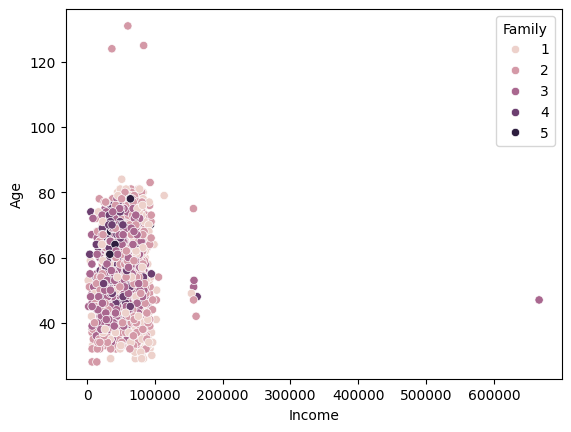

In [63]:
sns.scatterplot(data=Data,x='Income',y='Age',hue='Family')

<Axes: xlabel='Income', ylabel='Age'>

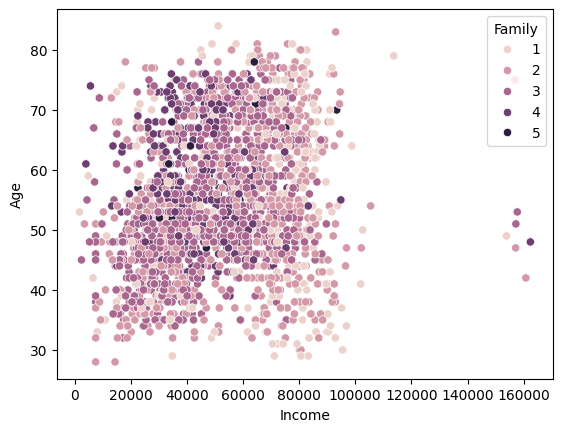

In [64]:
Data=Data[(Data['Age']<90) & (Data['Income']<300000)]
sns.scatterplot(data=Data,x='Income',y='Age',hue='Family')

<Axes: >

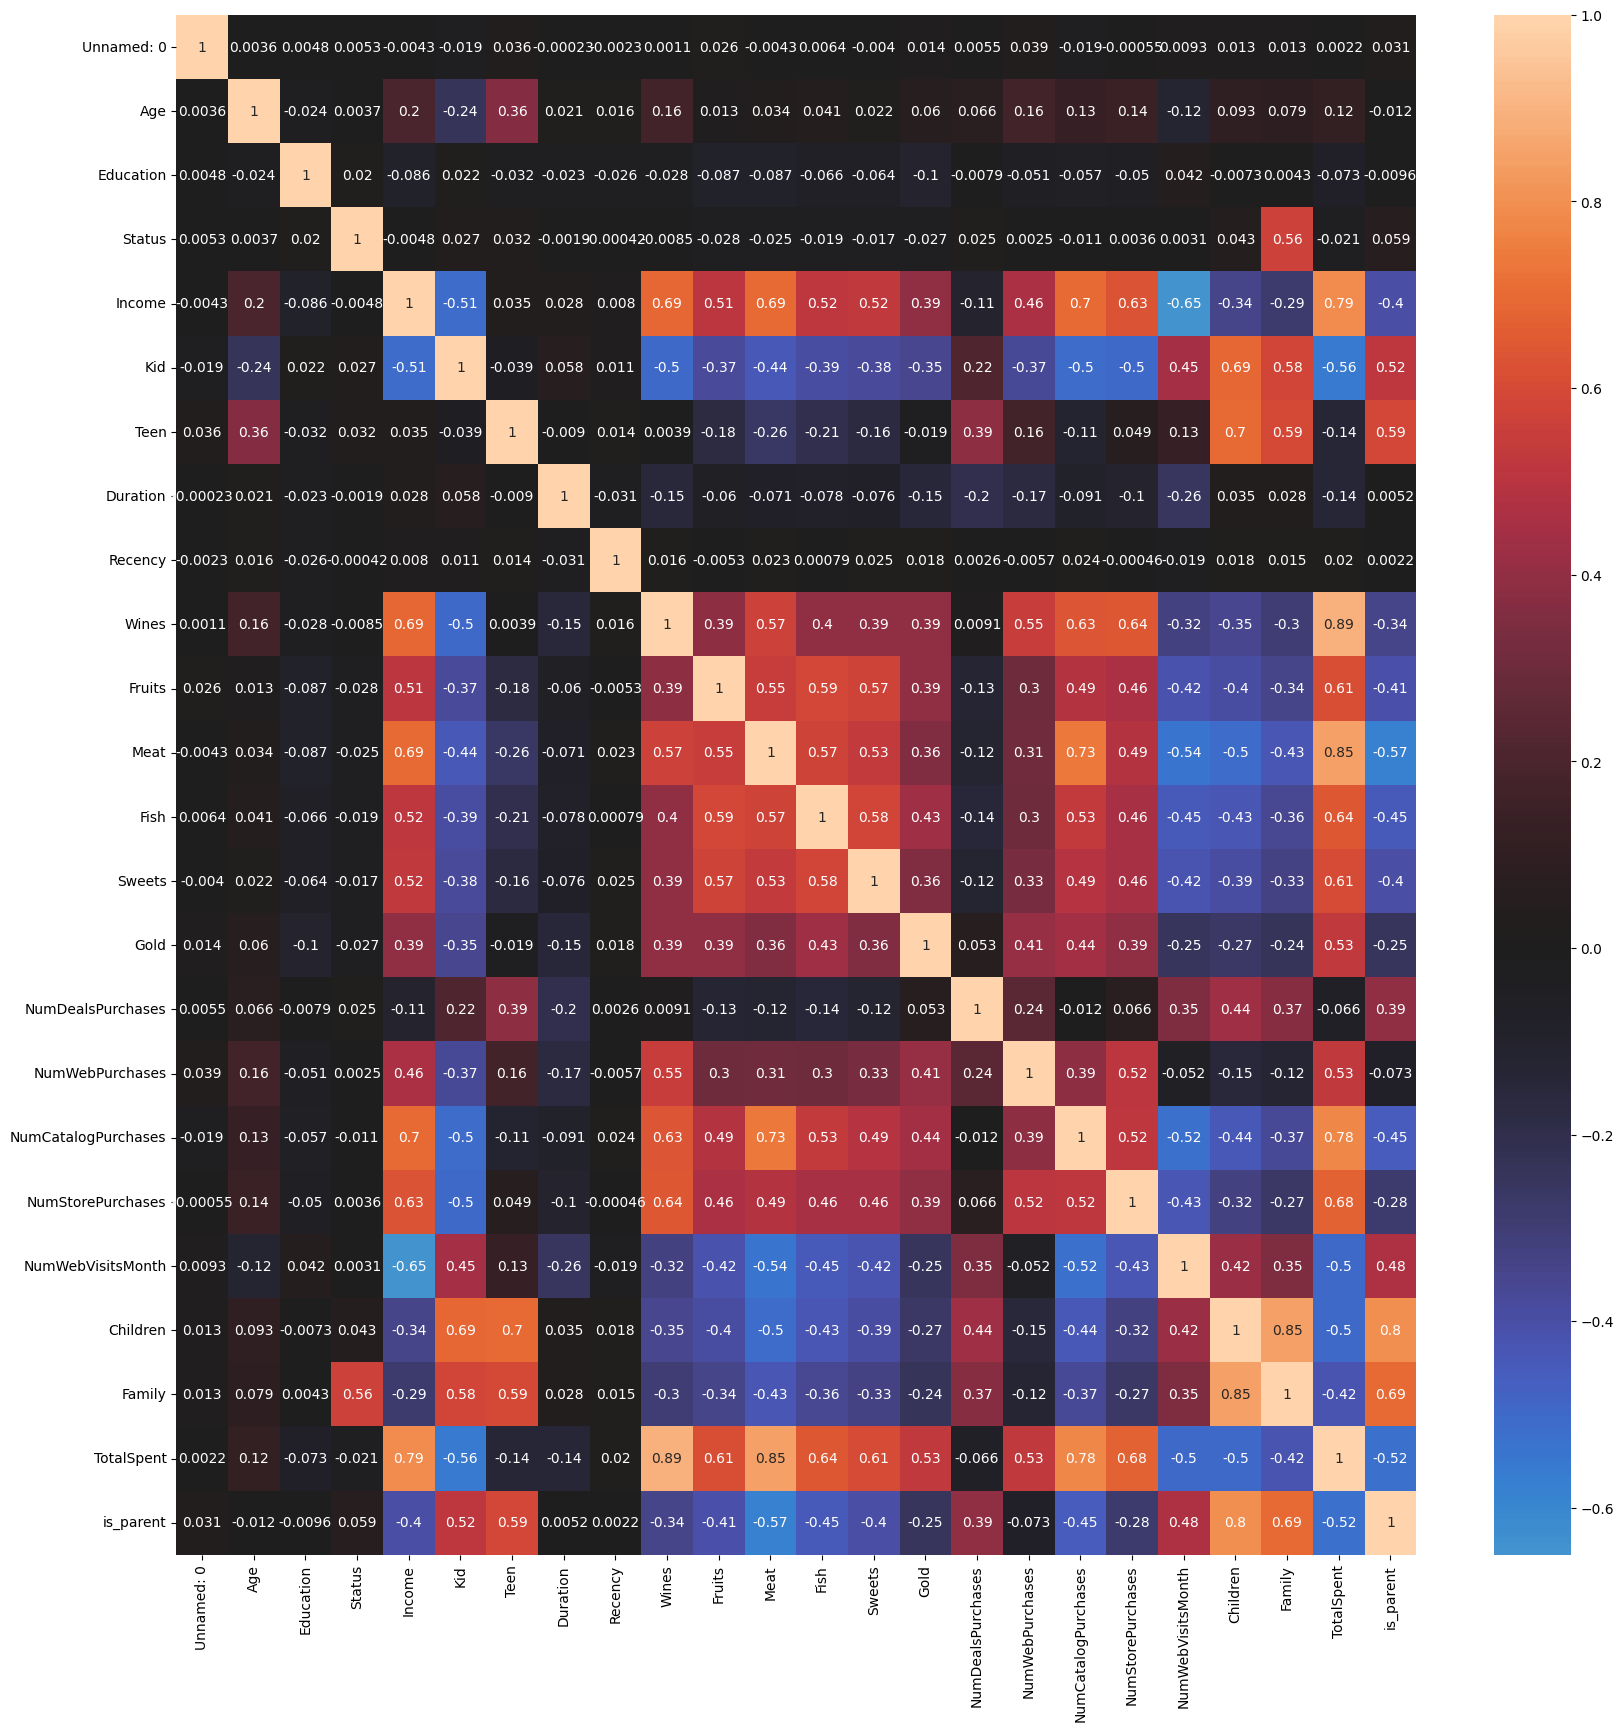

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(),annot=True,center=0)

In [66]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
data_acp=pd.DataFrame(scalar.fit_transform(Data),columns=Data.columns)

ValueError: x and y must have same first dimension, but have shapes (22,) and (24,)

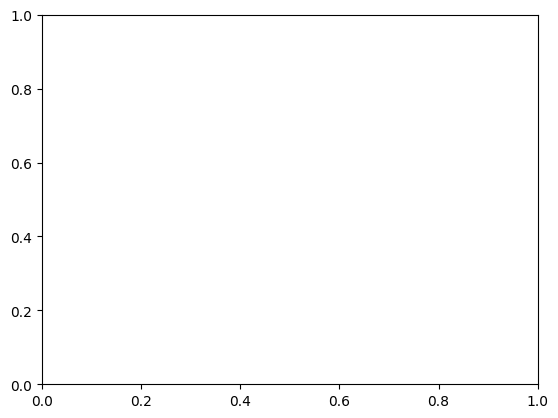

In [71]:
from sklearn.decomposition import PCA
acp=PCA()
acp.fit(data_acp)
explained=np.cumsum(acp.explained_variance_ratio_)
plt.plot(range(1,24),explained)


In [69]:
data_acp=pd.DataFrame(acp.transform(data_acp))

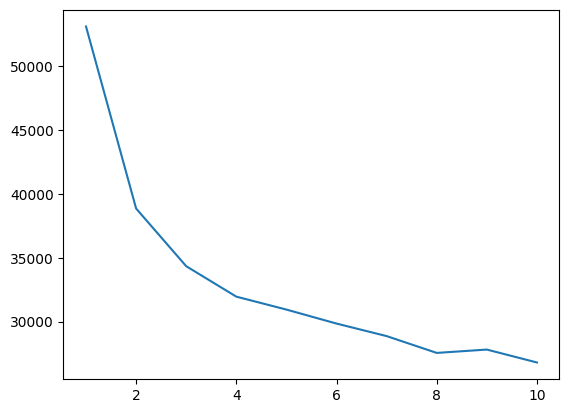

In [70]:
from sklearn.cluster import KMeans
inertie=[]
for k in range(1,11):
    kM=KMeans(n_clusters=k)
    kM.fit(data_acp)
    inertie.append(kM.inertia_)
plt.plot(range(1,11),inertie)

In [72]:
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=4)
Data['Cluster']=AC.fit_predict(data_acp.iloc[:,:15])

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(projection='3d')
ax.scatter(data_acp[0],data_acp[1],data_acp[2],c=Data['Cluster'],marker='o')